In [45]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [46]:
Nt = 500
Nx = 60
Ny = 60

x = np.linspace(-5,5,Nx)
y = np.linspace(-5,5,Ny)
t = np.linspace(0,10,Nt)

dx = x[1] - x[0]
dy = y[1] - y[0]
dt = t[1] - t[0]

dx,dy,dt

(0.16949152542372836, 0.16949152542372836, 0.02004008016032064)

In [47]:
u = np.zeros((Nt,Nx,Ny))
def ui(x,y):
    return 5*np.exp(-(x**2+y**2))

In [48]:
for i in range(len(x)):
    for j in range(len(y)):
        u[0,i,j] = ui(x[i],y[j])

In [49]:
def InitU():
    u[0,0,:] = 0
    u[0,:,0] = 0
    
    return u

In [50]:
u = InitU()
u

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 2.70071223e-20, 1.34940473e-19, ...,
         1.34940473e-19, 2.70071223e-20, 5.10342939e-21],
        [0.00000000e+00, 1.34940473e-19, 6.74227010e-19, ...,
         6.74227010e-19, 1.34940473e-19, 2.54991690e-20],
        ...,
        [0.00000000e+00, 1.34940473e-19, 6.74227010e-19, ...,
         6.74227010e-19, 1.34940473e-19, 2.54991690e-20],
        [0.00000000e+00, 2.70071223e-20, 1.34940473e-19, ...,
         1.34940473e-19, 2.70071223e-20, 5.10342939e-21],
        [0.00000000e+00, 5.10342939e-21, 2.54991690e-20, ...,
         2.54991690e-20, 5.10342939e-21, 9.64374924e-22]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 

<IPython.core.display.Javascript object>


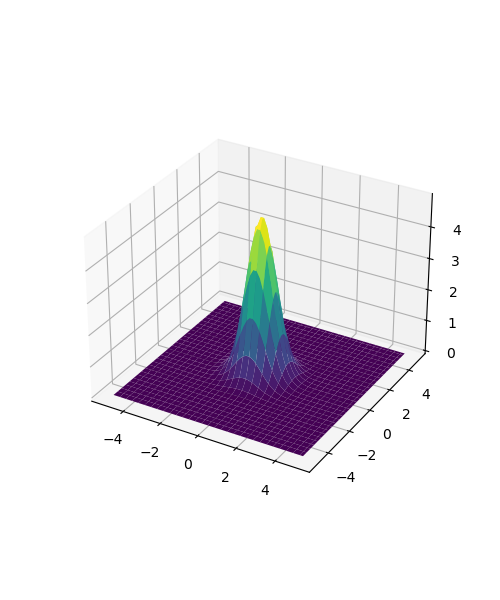

In [51]:
fig1 = plt.figure(figsize=(5,6))
ax1 = fig1.add_subplot(111, projection='3d')
X,Y = np.meshgrid(x,y)
ax1.plot_surface(X,Y,u[0,:,:],cmap='viridis')

In [55]:
def GetSolution(u):
    
    v = 0.3
    
    for l in tqdm(range(0,len(t)-1)):
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                u1 = v*((u[l,i+1,j]-2*u[l,i,j]+u[l,i-1,j])/dx**2)*dt
                u2 = v*((u[l,i,j+1]-2*u[l,i,j]+u[l,i,j-1])/dy**2)*dt
                u3 = u[l,i,j]*((u[l,i+1,j]-u[l,i-1,j])/(2*dx))*dt
                u4 = u[l,i,j]*((u[l,i,j+1]-u[l,i,j-1])/(2*dy))*dt
                
                u[l+1,i,j] = u1 + u2 - u3 - u4 + u[l,i,j]
    return u

In [56]:
uf = GetSolution(u)
uf

100%|████████████████████████████████████████████████████████████████████████████████| 499/499 [00:06<00:00, 75.01it/s]


array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 2.70071223e-20, 1.34940473e-19, ...,
         1.34940473e-19, 2.70071223e-20, 5.10342939e-21],
        [0.00000000e+00, 1.34940473e-19, 6.74227010e-19, ...,
         6.74227010e-19, 1.34940473e-19, 2.54991690e-20],
        ...,
        [0.00000000e+00, 1.34940473e-19, 6.74227010e-19, ...,
         6.74227010e-19, 1.34940473e-19, 2.54991690e-20],
        [0.00000000e+00, 2.70071223e-20, 1.34940473e-19, ...,
         1.34940473e-19, 2.70071223e-20, 5.10342939e-21],
        [0.00000000e+00, 5.10342939e-21, 2.54991690e-20, ...,
         2.54991690e-20, 5.10342939e-21, 9.64374924e-22]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 6.08793710e-20, 3.01955963e-19, ...,
         3.01955963e-19, 6.19474094e-20, 0.00000000e+00],
        [0.00000000e+00, 

<IPython.core.display.Javascript object>


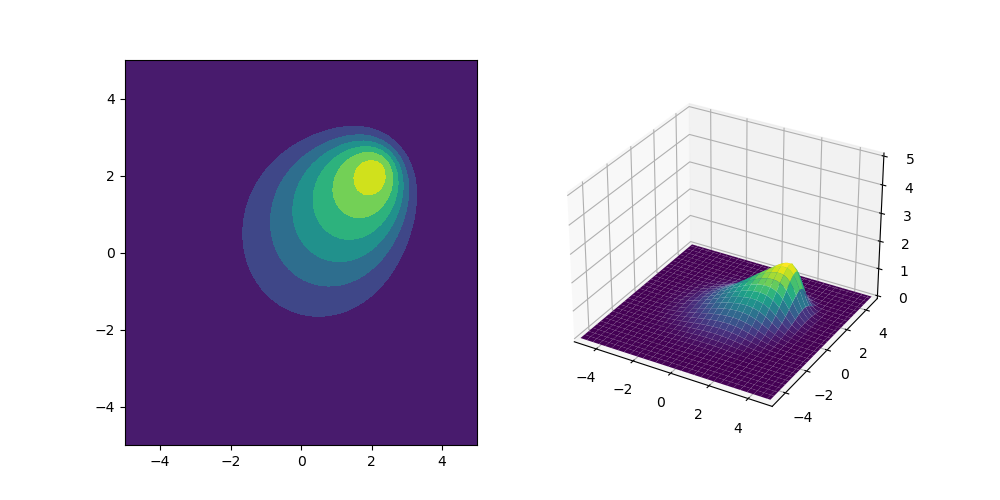

In [64]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(122, projection='3d')
ax3 = fig.add_subplot(121)

X,Y = np.meshgrid(x,y)

def init():
    
    
    ax.set_xlim3d(-5,5)
    ax.set_ylim3d(-5,5)
    ax.set_zlim3d(0,5)
    
    ax3.set_xlim(-5,5)
    ax3.set_ylim(-5,5)

def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,u[i,:,:],cmap='viridis')
    ax3.contourf(X,Y,u[i,:,:])
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)